## Импорт и подготовка данных

In [997]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");

RAND = 10

In [998]:
data = pd.read_csv('C:\\Users\\Alex\\Desktop\\second_task\\test_Feb22.csv')

In [999]:
data.head()

,Unnamed: 0,time,user_id,type,amount,target,feature1,feature2,events_ordinal_number,second_event_time,loan_ordinal_number,events_time_diff,previous_loans_max_amount
0,0,2001-01-01 00:00:00,114,loanRequest,14651,NaN,1,1,1,2001-01-25 05:00:00,1,NaN,NaN
1,1,2001-01-01 01:00:00,199,loanRequest,13398,NaN,0,0,1,2001-01-08 01:00:00,1,NaN,NaN
2,2,2001-01-01 02:00:00,717,loanRequest,14525,NaN,0,0,1,2001-01-09 16:00:00,1,NaN,NaN
3,3,2001-01-01 03:00:00,66,loan,14437,1.0,1,1,1,2001-03-27 17:00:00,1,NaN,NaN
4,4,2001-01-01 04:00:00,584,loanRequest,15861,NaN,1,0,1,2001-01-05 10:00:00,1,NaN,NaN


In [1000]:
print(f'Data size = {data.shape}')

Data size = (10000, 13)


In [1001]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   time                       10000 non-null  object 
 2   user_id                    10000 non-null  int64  
 3   type                       10000 non-null  object 
 4   amount                     10000 non-null  int64  
 5   target                     2019 non-null   float64
 6   feature1                   10000 non-null  int64  
 7   feature2                   10000 non-null  int64  
 8   events_ordinal_number      10000 non-null  int64  
 9   second_event_time          9999 non-null   object 
 10  loan_ordinal_number        10000 non-null  int64  
 11  events_time_diff           9000 non-null   object 
 12  previous_loans_max_amount  5642 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage

In [1002]:
data_new = data[data['target'].notna()]

In [1003]:
data_new = data_new.reset_index()

In [1004]:
data_new

,index,Unnamed: 0,time,user_id,type,amount,target,feature1,feature2,events_ordinal_number,second_event_time,loan_ordinal_number,events_time_diff,previous_loans_max_amount
0,3,3,2001-01-01 03:00:00,66,loan,14437,1.0,1,1,1,2001-03-27 17:00:00,1,NaN,NaN
1,6,6,2001-01-01 06:00:00,179,loan,13306,1.0,0,0,1,2001-01-14 20:00:00,1,NaN,NaN
2,7,7,2001-01-01 07:00:00,214,loan,15871,1.0,1,0,1,2001-01-10 06:00:00,1,NaN,NaN
3,10,10,2001-01-01 10:00:00,652,loan,14115,0.0,1,0,1,2001-01-25 03:00:00,1,NaN,NaN
4,24,24,2001-01-02 00:00:00,540,loan,15826,0.0,1,1,1,2001-01-06 02:00:00,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,9972,9972,2002-02-20 12:00:00,200,loan,17175,0.0,0,0,11,2001-01-25 07:00:00,3,35 days 05:00:00,14852.0
2015,9976,9976,2002-02-20 16:00:00,749,loan,15319,1.0,0,1,8,2001-07-02 05:00:00,3,29 days 19:00:00,16720.0
2016,9982,9982,2002-02-20 22:00:00,556,loan,14728,0.0,1,1,11,2001-02-23 02:00:00,2,16 days 18:00:00,15431.0
2017,9987,9987,2002-02-21 03:00:00,529,loan,13971,1.0,1,0,14,2001-02-17 19:00:00,2,8 days 22:00:00,15436.0


In [1005]:
data_new.drop(['user_id', 'Unnamed: 0', 'index'], axis=1).describe()

,amount,target,feature1,feature2,events_ordinal_number,loan_ordinal_number,previous_loans_max_amount
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,1151.000000
mean,15012.316493,0.519069,0.613670,0.490837,5.990094,2.006439,15360.825369
std,991.074001,0.499760,0.487028,0.500040,3.626232,1.140070,992.563310
min,11731.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11731.000000
25%,14361.500000,0.000000,0.000000,0.000000,3.000000,1.000000,14736.000000
50%,15029.000000,1.000000,1.000000,0.000000,5.000000,2.000000,15394.000000
75%,15657.000000,1.000000,1.000000,1.000000,8.000000,3.000000,16047.500000
max,18578.000000,1.000000,1.000000,1.000000,20.000000,8.000000,18578.000000


In [1006]:
data_new.nunique()

index                        2019
Unnamed: 0                   2019
time                         2019
user_id                       868
type                            1
amount                       1547
target                          2
feature1                        2
feature2                        2
events_ordinal_number          20
second_event_time             868
loan_ordinal_number             8
events_time_diff             1182
previous_loans_max_amount     738
dtype: int64

## Гипотезы

1. Целевая переменная target зависит от переменной feature1.
2. Целевая переменная target зависит от переменной feature2.

## Target

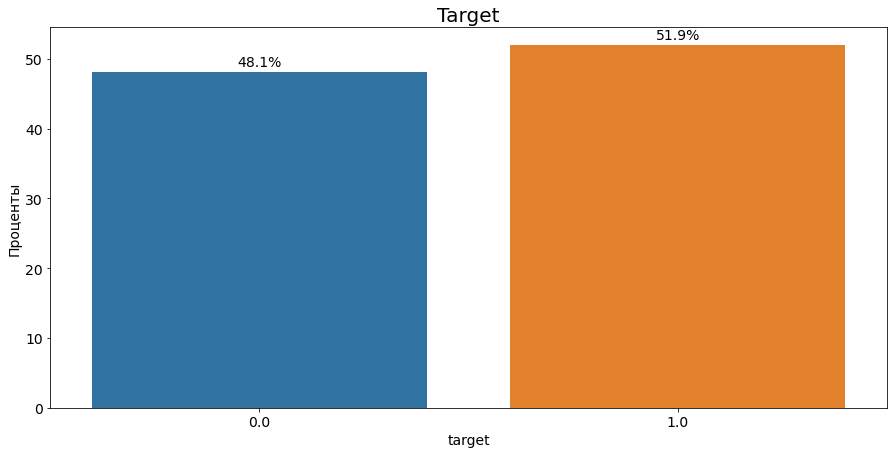

In [1007]:
# нормирование на размер датасета
norm_target = (data_new
               .target
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Target', fontsize=20)

plt.xlabel('target', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Corr

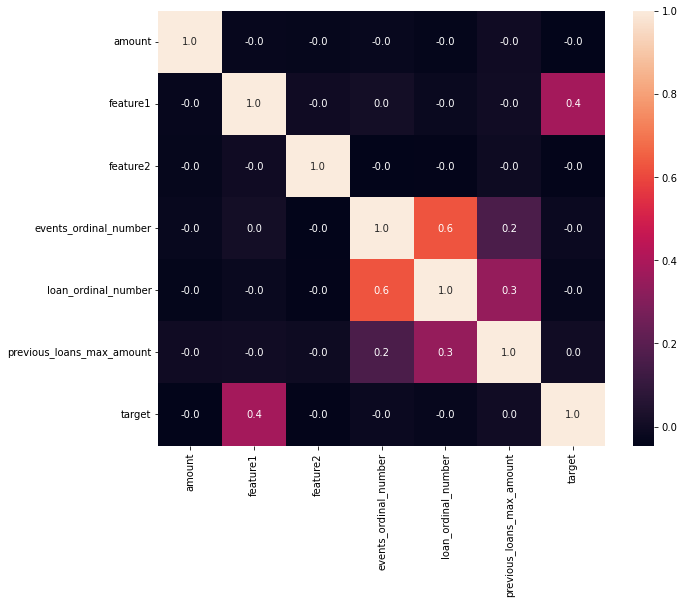

In [1008]:
num_cols = ['type', 'amount', 'feature1', 'feature2', 'events_ordinal_number', 
            'second_event_time', 'loan_ordinal_number', 'events_time_diff', 'previous_loans_max_amount', 'target']

plt.figure(figsize=(10, 8))

sns.heatmap(data_new[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

На теплокарте очевидна значимость признака feature1 для целевой переменной target.

## Feature1

Text(0.5, 1.0, 'Взаимосвязь target и feature1')

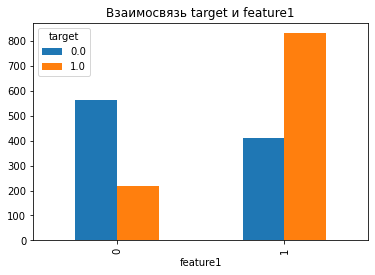

In [1009]:
pd.crosstab(data_new.feature1,data_new.target).plot(kind='bar')
plt.title('Взаимосвязь target и feature1')

При feature1 = 0 наблюдается преобладание target = 0 больше, чем в 2 раза. При feature1 = 1 наблюдается преобладание target = 1 примерно в 2 раза. 

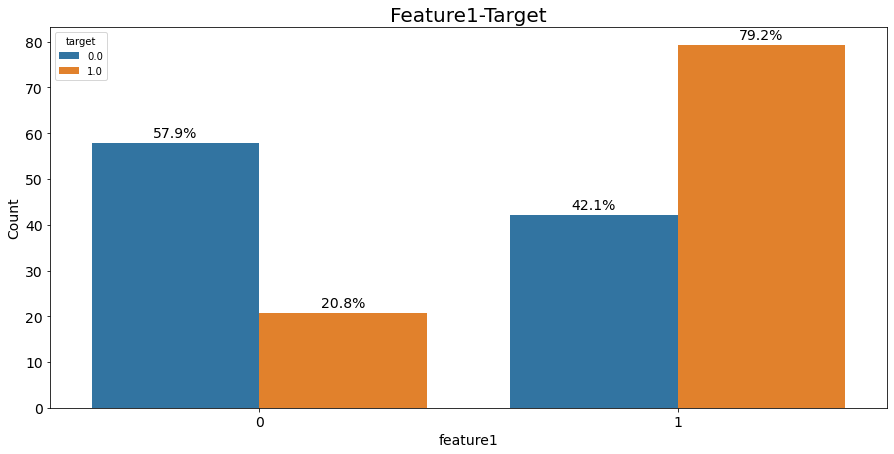

In [1010]:
plt.figure(figsize=(15, 7))

feature1_def = (data_new.groupby(['target'])['feature1']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('feature1'))

ax = sns.barplot(x="feature1", y="percentage", hue="target", data=feature1_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Feature1-Target', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('feature1', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

При feature1 = 0 наблюдается преобладание target = 0 (57,9%). При feature1 = 1 наблюдается преобладание target = 1 (79,2%). Наблюдается зависимость между переменными target и feature1.

## Feature2

Text(0.5, 1.0, 'Взаимосвязь target и feature2')

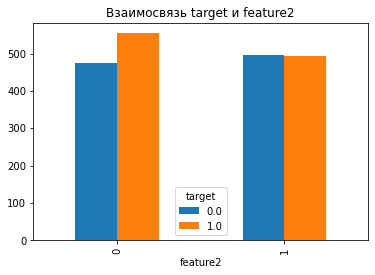

In [1011]:
pd.crosstab(data_new.feature2,data_new.target).plot(kind='bar')
plt.title('Взаимосвязь target и feature2')

И при feature2 = 0, и при feature2 = 1 наблюдается незначительное различие между частотами target = 0 и target = 1. 

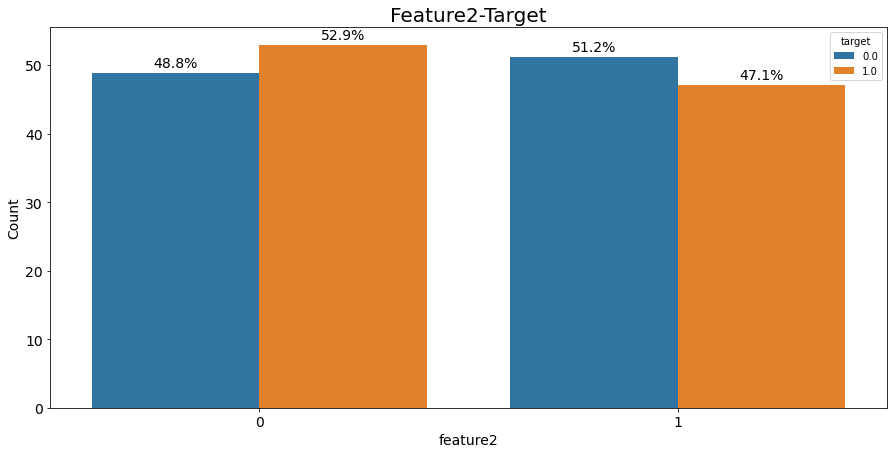

In [1012]:
plt.figure(figsize=(15, 7))

feature1_def = (data_new.groupby(['target'])['feature2']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('feature2'))

ax = sns.barplot(x="feature2", y="percentage", hue="target", data=feature1_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Feature2-Target', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('feature2', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

При feature2 = 0 наблюдается незначительное преобладание target = 1 (52,9%). При feature2 = 1 наблюдается незначительное преобладание target = 0 (51,2%).

In [1013]:
data_new.drop(['time', 'second_event_time', 'events_time_diff', 'previous_loans_max_amount', 
               'events_ordinal_number', 'loan_ordinal_number', 'user_id', 'type', 'Unnamed: 0', 'index'],  axis=1, inplace=True)

In [1014]:
data_new.head()

,amount,target,feature1,feature2
0,14437,1.0,1,1
1,13306,1.0,0,0
2,15871,1.0,1,0
3,14115,0.0,1,0
4,15826,0.0,1,1


In [1015]:
cat_cols = ['feature1', 'feature2']

## Моделирование

In [1016]:
data_new_label = pd.get_dummies(data_new, columns=cat_cols, drop_first=True)

In [1017]:
X = data_new_label.drop('target', axis=1)
y = data_new_label['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

## Baseline

In [1018]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [1019]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.693384223918575
precision: 0.6582278481012658
recall: 0.7938931297709924
f1: 0.7197231833910034
logloss: 11.079936896035626


In [1020]:
# Добавим метрики в таблицу
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

In [1021]:
metrics

,Baseline_LR
roc-auc,0.693384
precision,0.658228
recall,0.793893
f1,0.719723
logloss,11.079937


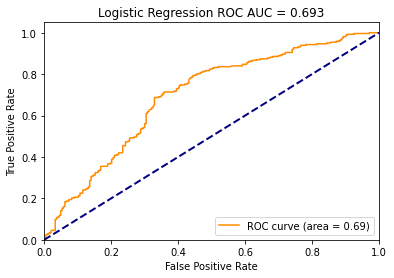

In [1022]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

## Подбор параметров

In [1023]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#parameters_Svm = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4]}
param_grid_Svm = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf','poly']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
parameters_Svm = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = 1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [1024]:
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)

In [1025]:
y_score = lr.predict_proba(X_test)[:,1]

In [1026]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.693384223918575
precision: 0.6603174603174603
recall: 0.7938931297709924
f1: 0.7209705372616985
logloss: 11.011541696050793


In [1027]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

In [1028]:
metrics

,Baseline_LR
roc-auc,0.693384
precision,0.660317
recall,0.793893
f1,0.720971
logloss,11.011542


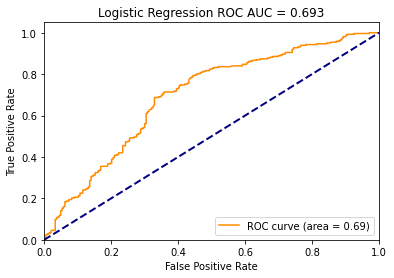

In [1029]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

Улучшить модель можно так же, например, с помощью кроссвалидации.

## Предсказание отсутствующих данных целевой переменной

In [1030]:
bool_series = pd.isnull(data["target"])

In [1031]:
second_data = data[bool_series]

In [1032]:
second_data = second_data.reset_index()

In [1033]:
second_data.drop(['time', 'second_event_time', 'events_time_diff', 'previous_loans_max_amount', 
               'events_ordinal_number', 'loan_ordinal_number', 'user_id', 'type', 'Unnamed: 0', 'index', 'target'], 
                 axis=1, inplace=True)

In [1034]:
second_data.head()

,amount,feature1,feature2
0,14651,1,1
1,13398,0,0
2,14525,0,0
3,15861,1,0
4,14603,0,0


In [1035]:
Z_test = second_data

In [1036]:
z_pred = lr.predict(Z_test)

In [1037]:
z_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [1038]:
second_data['target'] = z_pred

In [1039]:
second_data.head()

,amount,feature1,feature2,target
0,14651,1,1,1.0
1,13398,0,0,0.0
2,14525,0,0,0.0
3,15861,1,0,1.0
4,14603,0,0,0.0


## Объединяем датасет с предсказанными данными целевой переменной и датасет с данными целевой переменной, которые уже были в исходном датасете 

In [1040]:
finish_data = pd.concat([data_new, second_data], ignore_index=True)

In [1041]:
finish_data

,amount,target,feature1,feature2
0,14437,1.0,1,1
1,13306,1.0,0,0
2,15871,1.0,1,0
3,14115,0.0,1,0
4,15826,0.0,1,1
...,...,...,...,...
9995,14927,1.0,1,1
9996,15159,0.0,0,1
9997,15636,1.0,1,0
9998,14736,0.0,0,1


## Анализ важных признаков

Так как исходные данные (data) не сбалансированы (много отсутствующих данных в целевой переменной target, я думаю, целесообразно провести анализ важных признаков и для датасета с исходными данными (кроме строк с NaN), и для конечного датасета с предсказанными данными.

[1.83756069e-01 8.16060434e-01 1.83496818e-04]
0.9702


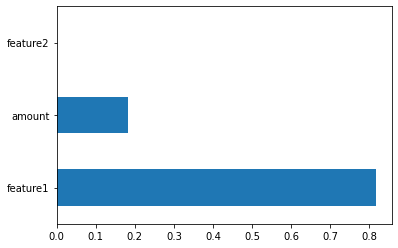

In [1042]:
from sklearn.ensemble import ExtraTreesClassifier

y_finish = finish_data['target']
x_finish = finish_data.drop('target',  axis=1)

model = ExtraTreesClassifier()
model.fit(x_finish, y_finish)
print(model.feature_importances_)
print(model.score(x_finish, y_finish))

feat_importances = pd.Series(model.feature_importances_, index=x_finish.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Признаки расположены по степени их важности по оси OY. В датасете, содержащем предсказанные значения целевой переменной target, переменная feature1 оказалась наиболее значимой для целевой переменной по сравнению с другими рассматриваемыми переменными.

[0.84036336 0.15562918 0.00400746]
0.9692917285785042


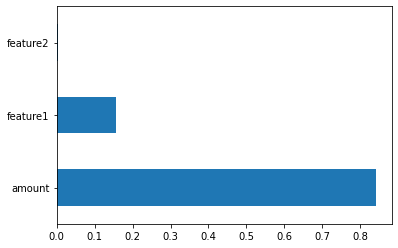

In [1043]:
from sklearn.ensemble import ExtraTreesClassifier

y_new = data_new['target']
x_new = data_new.drop('target',  axis=1)

model = ExtraTreesClassifier()
model.fit(x_new, y_new)
print(model.feature_importances_)
print(model.score(x_new, y_new))

feat_importances = pd.Series(model.feature_importances_, index=x_new.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

В датасете, который не содержит строки с NaN в целевой переменной target, переменная amount оказалась более значимой. Но в то же время переменная feature1 по сравнению с переменной feature2 оказалась более значимой для целевой переменной.